In [1]:
from minutiae.features import FeatureExtractor

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import pandas as pd
import random
import numpy as np

In [3]:
BASE_PATH = Path("data/enhanced/Training/")

In [4]:
imgs = list(BASE_PATH.glob("Live/*.[bp][mn][pg]"))
len(imgs)

10366

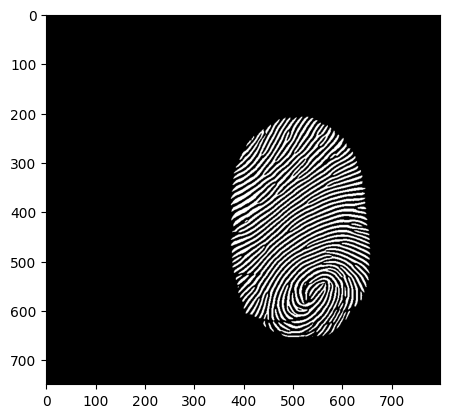

In [5]:
image = np.array(Image.open(imgs[3442]).convert('L'))
plt.imshow(image, cmap="gray")

In [6]:
imgs[256]

PosixPath('data/enhanced/Training/Live/Time_Series_3088988_L2_1_1.bmp')

In [7]:
ex = FeatureExtractor()

In [8]:
term, biff = ex.extract_features(image)

In [9]:
import cv2 as cv
test = [cv.KeyPoint(fe.Y, fe.X, 3 ,fe.orientation[0]) for fe in term]
test.extend([cv.KeyPoint(fe.Y, fe.X, 5 ,fe.orientation[0]) for fe in biff])

In [10]:
img_min=cv.drawKeypoints(image*80,test,image*80)

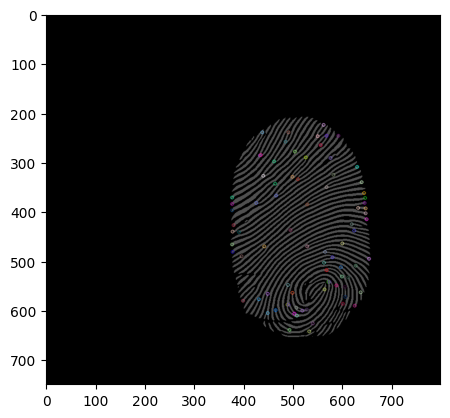

In [23]:
plt.imshow(img_min, cmap="gray_r")

In [12]:
sift = cv.SIFT_create()
kp, des = sift.compute(image, test)
_, des2 = sift.compute(image*255, test)
(des == des2).min()

False

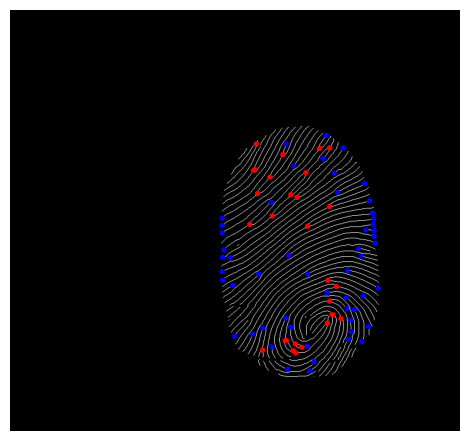

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
disp = ex.show_results(image)
plt.imshow(disp)
plt.tight_layout()
plt.axis('off')
plt.show()

In [14]:
kp, des2 = ex.get_sift_descriptor(image)
(des == des2).min()

True

In [15]:
import torch
np.random.shuffle(des)
sift_features = torch.tensor(des[:2, :].ravel())
sift_features

tensor([  0.,  72.,  14.,   0.,   1.,  68.,  13.,   0.,   1.,  87.,  10.,   1.,
         11.,  90.,   3.,   0.,  17., 105.,   1.,   0.,  14.,  79.,   0.,   0.,
         13.,  70.,   0.,   0.,  11.,  79.,   0.,   0.,   0.,  81.,  28.,   0.,
          0.,  75.,  25.,   0.,   3.,  69.,  23.,   1.,  13.,  73.,  52.,   8.,
         14.,  96.,   3.,   1.,  20., 105.,  16.,   2.,   6., 105.,   1.,   0.,
          9.,  90.,   2.,   0.,   0.,  78.,  25.,   0.,   0.,  84.,  25.,   0.,
          1., 105.,  42.,   0.,   0.,  89.,  32.,   1.,   1., 105.,  27.,   0.,
          1., 105.,  18.,   0.,   0.,  97.,   2.,   0.,   1., 105.,   4.,   0.,
          1.,  69.,  13.,   0.,   0.,  74.,  12.,   0.,   1., 101.,  13.,   0.,
          0.,  84.,  21.,   0.,   0.,  87.,  14.,   0.,   1., 104.,  17.,   0.,
          0.,  84.,  10.,   0.,   1.,  75.,   5.,   0.,  46., 121.,   0.,   0.,
         19.,  53.,   0.,   0.,  49., 121.,   0.,   1.,  71.,  86.,   0.,   0.,
          1.,   2.,   0.,   0., 121., 12

In [16]:
x = torch.tensor([[1], [2]])

In [17]:
torch.cat((x, sift_features), 1)

RuntimeError: Tensors must have same number of dimensions: got 2 and 1

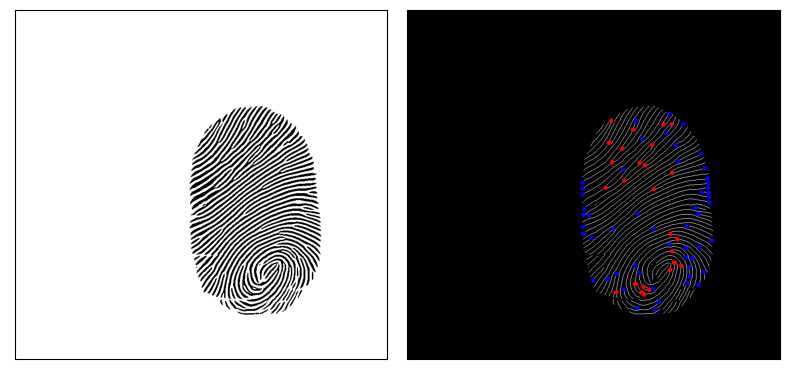

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))
for i, (img, a) in enumerate(zip([image, disp], ax.flat)):
    a.imshow(img, cmap="gray_r")
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig(f'{"minutiae"}.png')
plt.show()